# Ignition Delay (Constant Pressure Reactor)

Code is ported (almost) verbatim from cantera example file `reactor1.py` (distributed with cantera):
```
"""
Constant-pressure, adiabatic kinetics simulation.
"""
```

In [1]:
import numpy as np
import cantera as ct

import matplotlib.pyplot as plt
%matplotlib notebook

## Create Reactor using Cantera Objects

In [2]:
gas = ct.Solution('gri30.xml')
gas.TPX = 1001.0, ct.one_atm, 'H2:2,O2:1,N2:4'
r = ct.IdealGasConstPressureReactor(gas)

sim = ct.ReactorNet([r])
time = 0.0
states = ct.SolutionArray(gas, extra=['t'])

## Perform Time Integration

In [3]:
print('%10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','u [J/kg]'))
for n in range(100):
    time += 1.e-5
    sim.advance(time)
    states.append(r.thermo.state, t=time*1e3)
    print('%10.3e %10.3f %10.3f %14.6e' % (sim.time, r.T,
                                           r.thermo.P, r.thermo.u))

     t [s]      T [K]     P [Pa]       u [J/kg]
 1.000e-05   1001.000 101325.000   6.207683e+05
 2.000e-05   1001.000 101325.000   6.207683e+05
 3.000e-05   1001.000 101325.000   6.207683e+05
 4.000e-05   1001.000 101325.000   6.207683e+05
 5.000e-05   1001.000 101325.000   6.207683e+05
 6.000e-05   1001.000 101325.000   6.207682e+05
 7.000e-05   1001.000 101325.000   6.207682e+05
 8.000e-05   1001.000 101325.000   6.207682e+05
 9.000e-05   1001.001 101325.000   6.207681e+05
 1.000e-04   1001.001 101325.000   6.207680e+05
 1.100e-04   1001.001 101325.000   6.207678e+05
 1.200e-04   1001.002 101325.000   6.207676e+05
 1.300e-04   1001.003 101325.000   6.207672e+05
 1.400e-04   1001.005 101325.000   6.207665e+05
 1.500e-04   1001.008 101325.000   6.207656e+05
 1.600e-04   1001.012 101325.000   6.207640e+05
 1.700e-04   1001.019 101325.000   6.207616e+05
 1.800e-04   1001.030 101325.000   6.207579e+05
 1.900e-04   1001.048 101325.000   6.207518e+05
 2.000e-04   1001.076 101325.000   6.207

## Plot Results

<IPython.core.display.Javascript object>


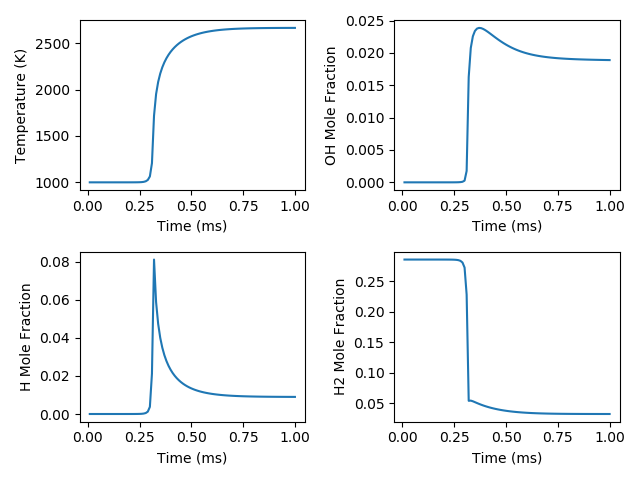

In [4]:
plt.clf()
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:,gas.species_index('OH')])
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:,gas.species_index('H')])
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:,gas.species_index('H2')])
plt.xlabel('Time (ms)')
plt.ylabel('H2 Mole Fraction')
plt.tight_layout()